# Case study #03 - Correlation and regression 

A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

         Add1(in Thousands) 290
         Add2(in Thousands) 312
         Add3(in Thousands) 309
         Add4(in Thousands) 298         
         Add5(in Thousands) 320


In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
#displaying  top 5  rows of the dataset
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


Note-         
                                                                                                                       It appears that we do not have empty/NaN values in the dataset, as the number of Non-Null counts for each column is equal to 205, which is exactly the number of rows in the dataset. We also note that our numeric data are detected as float values.

In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
# to know  statistical summary of integer datatype columns 
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [7]:
#renaming columns
data=data.rename(columns={'Profit(in Thousands)':'Profit'})

In [8]:
#to check new name of the columns
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [9]:
#shape of dataset
data.shape

(205, 7)

**1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

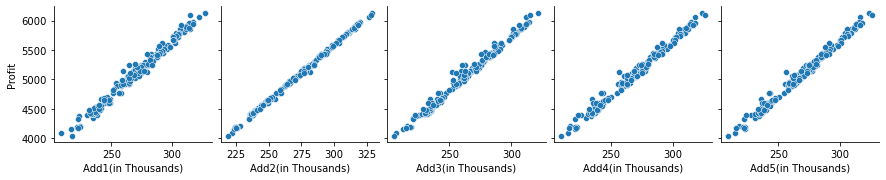

In [10]:
#Linearity Checking

sns.pairplot(data, x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'],y_vars='Profit')
plt.show()

 Observation-
 
 
 Every independent variables(features) have  strong positive linear relationship with dependent variable(target)


Correlation Matrix

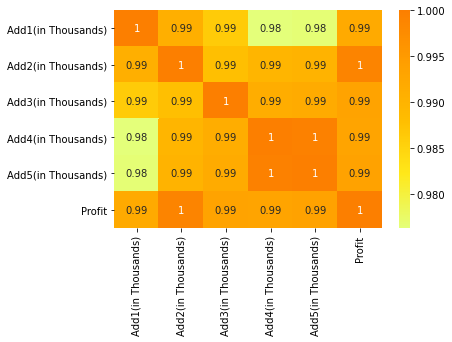

In [11]:
# correlation plot
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Observation

    The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe    that the correlation between Add2(in Thousands) and Profit is highest i.e. 1 and then between Profit and all remaining are same i.e. 0.99.

    correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.



Histogram of the data

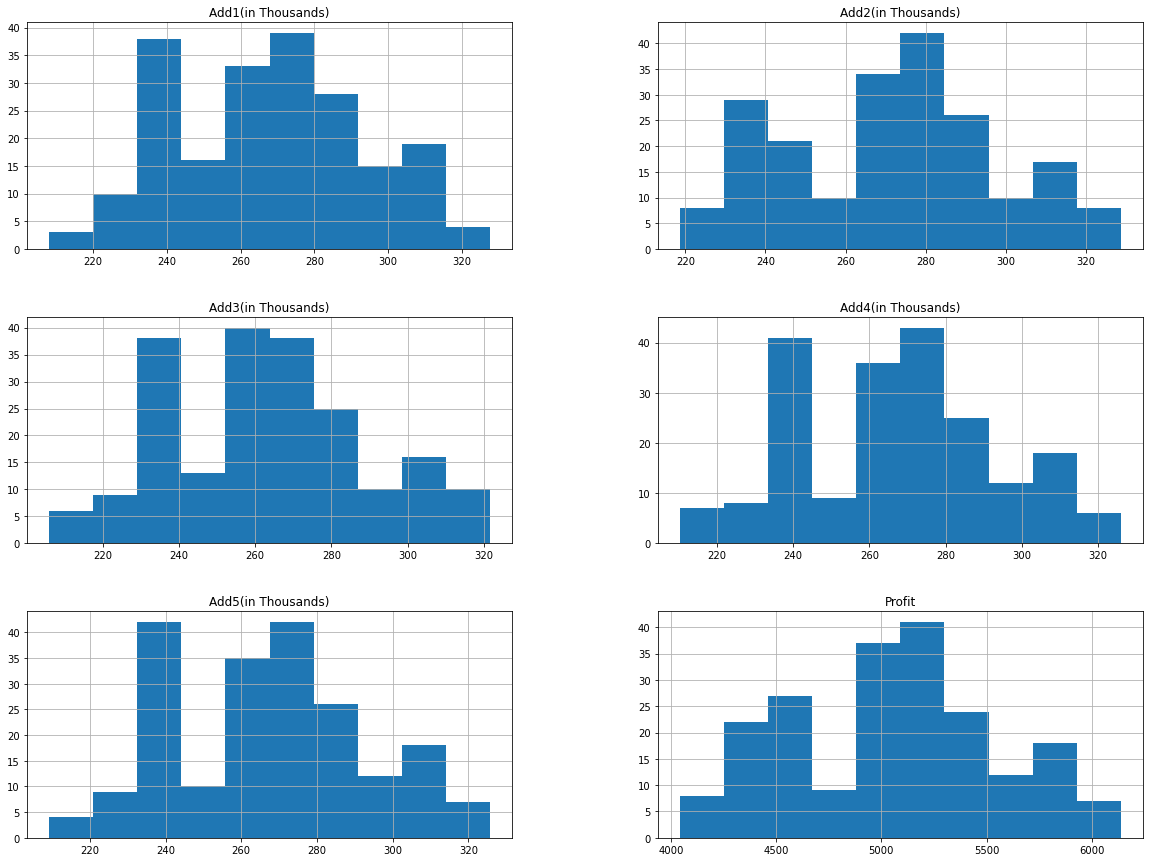

In [12]:
freqgraph= data.select_dtypes(include=['float'])         
freqgraph.hist(figsize=(20,15))                 
plt.show()

**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

<AxesSubplot:>

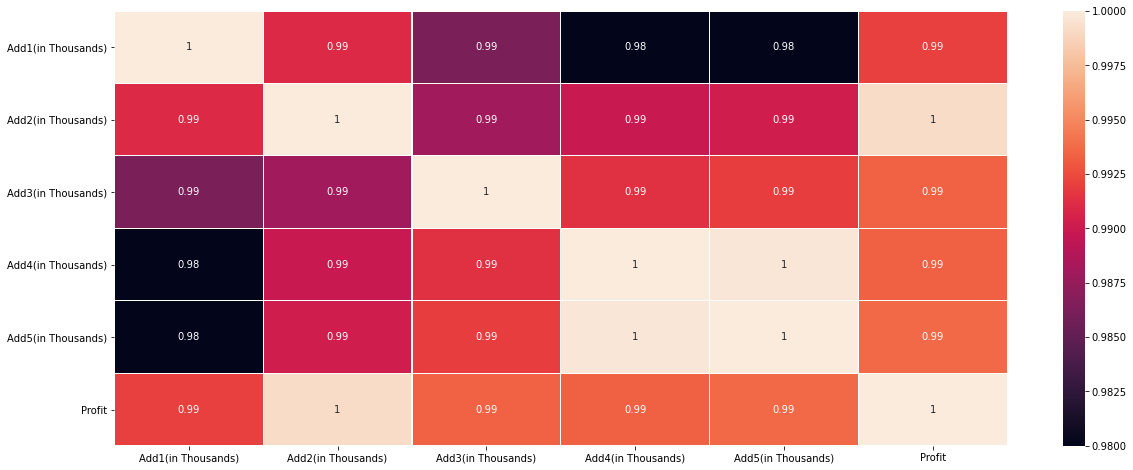

In [13]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidths=0.2)


Observation- 

Add4(in Thousands)& Add5(in Thousands) have high correlation with each other 




Note-

Creating 2 models

1.with all independent variables

2.removing one of Add4(in Thousands), Add5(in Thousands) which is high correlated to each other 

**Model 1(with all  independent variables)**

In [14]:
x=data.drop(['Date','Profit'],axis=1)

In [15]:
x.shape

(205, 5)

In [16]:
x

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [18]:
y=data['Profit']

In [19]:
y.shape

(205,)

In [20]:
y

0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Name: Profit, Length: 205, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [22]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [23]:
model=lr.fit(x_train,y_train)

In [24]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit, dtype: float64


Prediction

In [25]:
predictions=model.predict(x_test)

In [26]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
y_test = np.array(list(y_test))
predictions = np.array(predictions)
df4= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df4

,Actual,Predicted
0,4152.066,4152.066
1,4446.441,4446.441
2,5131.898,5131.898
3,4907.560,4907.560
4,5004.282,5004.282
5,4623.793,4623.793
6,5384.175,5384.175
7,5328.025,5328.025
8,5175.051,5175.051
9,5956.323,5956.323


Insight-

Actual profit values and predicted set of profit values are identical.

It is clear that this model is good one for predicting profits for further data regarding amount spend for advertisements

In [29]:
from sklearn import metrics

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 4.722376336128666e-13
Mean Squared Error: 4.613122646930347e-25
Root Mean Squared Error: 6.791997237138974e-13


In [31]:
rsquared = model.score(x_test, y_test)
print(' Root Squared:',rsquared )

 Root Squared: 1.0


In [32]:
#Adjusted RSquared of the model
n=len(data) #number of records
p=len(data.columns)-2 #number of features .i.e. columns excluding date and target variable
adjr= 1-(1-rsquared)*(n-1)/(n-p-1)
print(' Adjusted Root Squared:',adjr)

 Adjusted Root Squared: 1.0


Insight-

Value of Mean Squared Error is a minimal value1 &  r2 is equal to 1 ,so this model is a good /stable one for predicting profits.

In [33]:
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Add1(in Thousands),1.00
Add2(in Thousands),12.38
Add3(in Thousands),3.50
Add4(in Thousands),1.00
Add5(in Thousands),0.90


Find-

Coefficient values of Add2(in Thousands) & Add3(in Thousands) are greater than 1

In [34]:
print('Intercept:', lr.intercept_)

Intercept: -1.8189894035458565e-12


**Model 2 ( by removing Add4(in Thousands))**

In [35]:
a=data.drop(['Date','Add4(in Thousands)','Profit',],axis=1)

In [36]:
a.shape

(205, 4)

In [37]:
a

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,215.15
1,217.00,218.60,205.90,209.20
2,223.50,227.80,216.15,218.20
3,230.00,237.50,225.75,227.60
4,234.55,234.60,221.05,230.90
...,...,...,...,...
200,288.00,288.25,279.20,284.30
201,290.00,292.50,282.20,284.45
202,298.60,298.60,286.65,287.80
203,290.00,299.55,285.90,298.35


In [38]:
b=data['Profit']

In [39]:
b.shape

(205,)

In [40]:
b

0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Name: Profit, Length: 205, dtype: float64

In [41]:
a_train,a_test,b_train,b_test=train_test_split(a,b,random_state=42,test_size=0.25)

In [42]:
from sklearn import linear_model
lr1=linear_model.LinearRegression()

In [43]:
new=lr1.fit(a_train,b_train)

In [44]:
print(b_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit, dtype: float64


Prediction

In [45]:
predictions_new=new.predict(a_test)

In [46]:
print(predictions_new)

[4153.2818461  4445.71740853 5130.40796973 4906.50501468 5006.82541736
 4623.35932117 5384.57472057 5328.09443997 5174.24658393 5956.1665879
 5780.67583526 4998.63516679 5075.71943506 5783.16863071 4936.48878199
 5065.32451176 4190.86807497 5034.91448533 5013.72184751 5134.46264443
 5145.26899938 5422.49401202 4569.02583391 4597.91098638 4436.70089824
 4175.21159561 5616.18272777 5667.26166773 4648.94682499 5717.83356248
 5000.53038317 5182.27013601 5017.70581515 5545.23999615 5013.74154448
 5033.29021927 5108.65226131 4760.01597517 4604.87740278 4925.60547473
 5252.35396509 5038.53361181 5491.86800825 5019.16609419 4646.96844429
 4486.3807748  4433.99207865 5300.48558185 5425.32966516 4482.14603852
 4193.23839733 6061.20029357]


In [48]:
b_test = np.array(list(b_test))
predictions = np.array(predictions_new)
df5= pd.DataFrame({'Actual-': b_test.flatten(), 'Predicted-': predictions_new.flatten()})
df5

,Actual-,Predicted-
0,4152.066,4153.281846
1,4446.441,4445.717409
2,5131.898,5130.407970
3,4907.560,4906.505015
4,5004.282,5006.825417
5,4623.793,4623.359321
6,5384.175,5384.574721
7,5328.025,5328.094440
8,5175.051,5174.246584
9,5956.323,5956.166588


Insight-

Actual data set taken for model and predicted set of data are almost same.

It is clear that this model is good one for predicting profits for further data regarding amount spend for advertisements


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, predictions_new))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, predictions_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, predictions_new)))

Mean Absolute Error: 0.5947155427993494
Mean Squared Error: 0.7591134869854522
Root Mean Squared Error: 0.8712711902648063


In [53]:
rsquared1 = new.score(a_test, b_test)
print('Adjusted Root Squared:',rsquared1)

Adjusted Root Squared: 0.9999964701499513


In [54]:
#Adjusted RSquared of the model
t=len(data) #number of records
v=len(data.columns)-3 #number of features .i.e. columns excluding date and target variable
adjr1= 1-(1-rsquared1)*(t-1)/(t-v-1)
print(' Adjusted Root Squared:',adjr1)

 Adjusted Root Squared: 0.9999963995529503


Insight-

      Value of Mean Squared Error is near to 1 & 
                Adjusted r2 is nearly to 1 
    so this model is a good /stable one for predicting profits.



In [55]:
coeff_df1 = pd.DataFrame(lr1.coef_, a.columns, columns=['Coefficient'])
coeff_df1

,Coefficient
Add1(in Thousands),1.004525
Add2(in Thousands),12.354097
Add3(in Thousands),3.480562
Add5(in Thousands),1.940944


Find-

Coefficient values of Add2(in Thousands) , Add3(in Thousands) & Add5(in Thousands) are greater than 1

In [56]:
print('Intercept:', lr.intercept_)

Intercept: -1.8189894035458565e-12


**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

         Add1(in Thousands) 290
         Add2(in Thousands) 312
         Add3(in Thousands) 309
         Add4(in Thousands) 298
         Add5(in Thousands) 320


**Prediction using model 1**

In [57]:
make_prediction=[[290,312,309,298,320]]
model.predict(make_prediction).item()

5820.060000000001

Find-

Model 1 predicts profit of 5820.06 when spending  290,312,309,298,320 amounts 

**Prediction using model 2**

In [58]:
make_pred=[[290,312,309,320]]
new.predict(make_pred).item()



5842.434955940881

Find-

Model 2 predicts profit of 5842.43 when spending 290,312,309,320 amounts


Obsevations-

Model 1 is better model for predicting profit because actual profit values & predicted profit values are same
                                                     ,also    Value of rsquared & adjusted rsqured=1